# Ordinary Differential Equations in Practice

In this notebook, we'll explore how to solve ordinary differential equations (ODEs) in practice, 
focusing on two approaches:

1. **Matrix Diagonalization** for linear, time-independent systems.  
2. **Numerical Integration** using the forward Euler method.

We'll also connect these methods to the Schrödinger equation, showing how the same ideas appear 
in quantum mechanical problems. 

---

## 1. Solving a Linear ODE by Diagonalization

As discussed in theory, if we have a system:

$$
\frac{d\mathbf{x}(t)}{dt} = A \, \mathbf{x}(t),
\quad 
\mathbf{x}(0) = \mathbf{x}_0 .
$$

If $A$ is diagonalizable, we can write:
$$
  A = V \, D \, V^{-1},
$$
where $D$ is a diagonal matrix whose entries are the eigenvalues $\lambda_i$ of $A$, and the 
columns of $V$ are the corresponding eigenvectors. Define:
$$
  \mathbf{z}(t) = V^{-1}\,\mathbf{x}(t).
$$

Then, plugging this into the first equation, we get

$$
  \frac{d\mathbf{z}(t)}{dt}
  = V^{-1}\, \frac{d\mathbf{y}(t)}{dt}
  = V^{-1}\, A\, \mathbf{y}(t)
  = V^{-1}\, (V \, D \, V^{-1})\, \mathbf{y}(t)
  = D \, \mathbf{z}(t).
$$

Hence, in the $\mathbf{z}$-coordinates, the system becomes a set of $n$ uncoupled first-order 
ODEs:

$$
  \frac{dz_i}{dt} = \lambda_i\, z_i(t),
  \quad
  \text{for } i = 1,\dots,n.
$$

These have the well-known solutions:

$$
  z_i(t) = z_i(0)\,e^{\lambda_i t}.
$$



We'll illustrate this with a simple of the harmonic oscillator.

### Example: Harmonic Oscillator

The harmonic oscillator is described by the second-order ODE:

$$
\frac{d^2 x}{dt^2} + \omega^2 x = 0,
$$

which can be rewritten as a first-order system:

$$
\begin{cases}
\frac{dx}{dt} = v, \\
\frac{dv}{dt} = -\omega^2 x.
\end{cases}
$$

or, in matrix form:

$$
\frac{d}{dt} \begin{pmatrix} x \\ v \end{pmatrix} = \begin{pmatrix} 0 & 1 \\ -\omega^2 & 0 \end{pmatrix} \begin{pmatrix} x \\ v \end{pmatrix}.
$$

By diagonalizing the matrix, we can find the solution to this system.


In [9]:
import numpy as np

omega = 2.0

# Define the 2x2 matrix A
A = np.array([[0.0,  1.0],
              [-omega**2, 0.0]])

# Initial condition: x(0) = 1, v(0) = 0.5
x0 = np.array([1.0, 0.5])

# Diagonalize A
eigs, V = np.linalg.eig(A)
V_inv = np.linalg.inv(V)

z0 = V_inv @ x0

# Define a time array
t_points = np.linspace(0, 2, 200)

X_t = []
for t in t_points:
    # Compute the solution at time t
    z_t = np.diag(np.exp(eigs * t)) @ z0
    x_t = V @ z_t # Transform back to original coordinates
    X_t.append(x_t)

X_t = np.array(X_t)

print("x(2) = ", X_t[-1])

x(2) =  [-0.84284424+0.j  1.18678318+0.j]


We have:
- `A`: the system matrix.
- `y0`: initial condition $\mathbf{y}(0)$.
- We diagonalize $A$ to find $A = V D V^{-1}$.
- Then $\exp(A t) = V \exp(D t) V^{-1}$.

If you run the code, you'll see the final value of $\mathbf{y}(2)$.  
We could also visualize the time evolution:

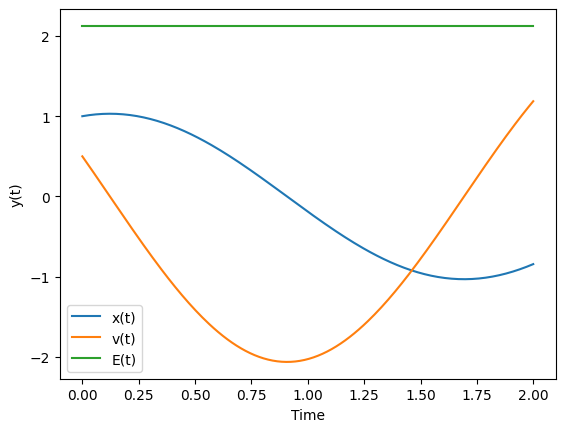

In [13]:
import matplotlib.pyplot as plt

plt.plot(t_points, X_t[:, 0], label="x(t)")
plt.plot(t_points, X_t[:, 1], label="v(t)")
plt.plot(t_points, 0.5 * omega**2 * X_t[:, 0]**2 + 0.5 * X_t[:, 1]**2, label="E(t)")
plt.xlabel("Time")
plt.ylabel("y(t)")
plt.legend()
plt.show()

---

## 2. Numerical Integration via the Forward Euler Method

Next, let's illustrate the **forward Euler** method for a simpler ODE.  
Consider the scalar equation:

$$
\frac{dy}{dt} = - \lambda \, y(t),
\quad
y(0) = y_0.
$$

We know the exact solution is $y(t) = y_0 \, e^{-\lambda t}$. We'll see how 
Euler's method approximates it.

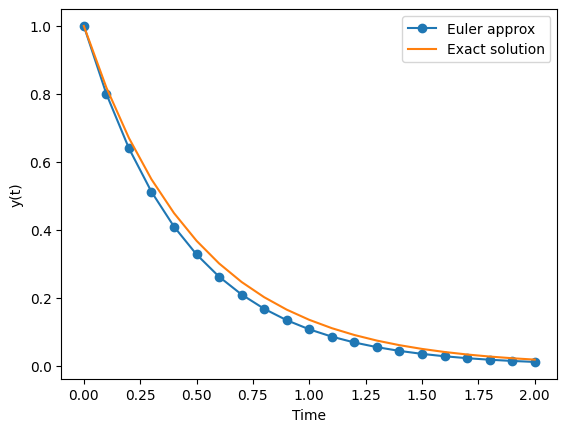

In [14]:
# Define parameters
lambda_ = 2.0
y0 = 1.0
tmax = 2.0
h = 0.1  # step size
num_steps = int(tmax / h)
t_array = np.linspace(0, tmax, num_steps + 1)

# Initialize
y_euler = np.zeros(num_steps + 1)
y_euler[0] = y0

# Forward Euler iteration
for n in range(num_steps):
    y_euler[n+1] = y_euler[n] + h * (-lambda_ * y_euler[n])

# Exact solution for comparison
y_exact = y0 * np.exp(-lambda_ * t_array)

# Plot results
plt.plot(t_array, y_euler, marker='o', label="Euler approx")
plt.plot(t_array, y_exact, label="Exact solution")
plt.xlabel("Time")
plt.ylabel("y(t)")
plt.legend()
plt.show()

Here we see how the Euler solution compares to the exact exponential decay. 
Notice that using a large time step $h$ can cause the Euler solution to deviate 
significantly from the exact decay (and may even diverge if $|1 - \lambda h| \ge 1$).

---

## 3. Connection to the Schrödinger Equation

### 3.1 A Two-Level System (Time-Independent)

Suppose we have a two-level system with Hamiltonian

$$
\hat{H} = 
\begin{pmatrix}
E_1 & 0 \\
0 & E_2
\end{pmatrix}.
$$

In matrix form (choosing $\hbar = 1$ for simplicity),

$$
\frac{d\mathbf{c}(t)}{dt} = -i \hat{H} \,\mathbf{c}(t),
$$
 
where $\mathbf{c}(t) = (c_1(t), c_2(t))^T$. 
If $H$ is diagonal, it is already in an eigenbasis. The solution is:

$$
\mathbf{c}(t) = 
\begin{pmatrix}
c_1(0) e^{-i E_1 t} \\
c_2(0) e^{-i E_2 t}
\end{pmatrix}.
$$

### 3.2 Numerical Approach for a Time-Dependent Hamiltonian

For more general cases (time-dependent $H(t)$ or non-diagonal forms), 
we can discretize time and use Euler or more advanced methods (like Runge--Kutta) 
to approximate:

$$
\mathbf{c}_{n+1} 
= \mathbf{c}_n + h \, \bigl[-\,i\,H(t_n)\,\mathbf{c}_n\bigr].
$$

We'll illustrate a short snippet (though often in practice, higher-order methods 
or libraries like QuTiP are preferred for accuracy).

In [15]:
def time_dependent_H(t):
    # Example: a Hamiltonian that slowly changes over time
    # (just a toy model: H = sigma_z + 0.1 * t * sigma_x)
    sigma_x = np.array([[0, 1],[1, 0]], dtype=complex)
    sigma_z = np.array([[1, 0],[0, -1]], dtype=complex)
    return sigma_z + 0.1 * t * sigma_x

# Euler solve of i d/dt c(t) = H(t) c(t),  c(0) = [1,0]^T
c0 = np.array([1.0, 0.0], dtype=complex)
tmax = 1.0
h = 0.01
num_steps = int(tmax / h)
c_vals = np.zeros((num_steps+1, 2), dtype=complex)
t_vals = np.linspace(0, tmax, num_steps+1)
c_vals[0] = c0

for n in range(num_steps):
    t_n = t_vals[n]
    H_n = time_dependent_H(t_n)
    c_vals[n+1] = c_vals[n] + h * (-1j) * (H_n @ c_vals[n])

# Just show the final state at t = tmax
print("Final state (approx) =", c_vals[-1])

Final state (approx) = [ 0.5420378 -0.84516162j -0.01512691-0.04184321j]


This is a very naive discretization. In practice, you would typically use more stable 
and accurate methods. Nonetheless, the procedure is exactly the same: we replace the 
time derivative by a finite difference and use the Hamiltonian to update the state.

---

# Summary

1. We reviewed how to **analytically solve** linear ODEs by **diagonalizing** the system matrix.
2. We **implemented the forward Euler** method for a simple ODE, showing how discretization 
   works in practice and discussing stability concerns.
3. We **connected these ideas to the Schrödinger equation**, illustrating how either diagonalization 
   (for a time-independent Hamiltonian) or numerical integration (for a time-dependent Hamiltonian) 
   can be used for quantum system simulations.

You can experiment with different time steps and matrices to see how the stability and accuracy 
change. For real-world simulations, higher-order solvers (e.g., Runge--Kutta methods) or 
specialized libraries (e.g., QuTiP for quantum systems) are often used to ensure both speed 
and reliability.